In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.set_option('display.float_format', '{:.0f}'.format)

## Cargando el dataset

In [36]:
df = pd.read_csv("data/all-states-history.csv")
print(f"El DataFrame esta compuesto por {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame esta compuesto por 20780 filas y 41 columnas.


## Inspeccionando el dataset

In [37]:
df.info()
print(df.describe(include="all").drop(index=["unique", "top", "freq"], errors="ignore"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              20780 non-null  object 
 1   state                             20780 non-null  object 
 2   death                             19930 non-null  float64
 3   deathConfirmed                    9422 non-null   float64
 4   deathIncrease                     20780 non-null  int64  
 5   deathProbable                     7593 non-null   float64
 6   hospitalized                      12382 non-null  float64
 7   hospitalizedCumulative            12382 non-null  float64
 8   hospitalizedCurrently             17339 non-null  float64
 9   hospitalizedIncrease              20780 non-null  int64  
 10  inIcuCumulative                   3789 non-null   float64
 11  inIcuCurrently                    11636 non-null  float64
 12  nega

In [38]:
df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,19930,9422,20780,7593,12382,12382,17339,20780,3789,11636,...,20614,20780,4789,3421,2200,999,9197,20780,14516,20780
mean,3682,3770,25,417,9263,9263,1191,37,1934,360,...,2186936,17508,163403,308920,165432,168188,965011,2740,2304555,12961
std,6281,4158,60,538,12621,12621,2060,208,1953,595,...,4436508,33586,201698,423285,178182,143748,1415215,16219,4445365,37495
min,0,0,-201,0,1,1,0,-12257,6,0,...,0,-130545,0,1,1,3,0,-1043744,0,-1154583
25%,161,607,0,79,985,985,166,0,501,60,...,104050,1206,18965,20047,54913,37676,141470,0,132460,0
50%,1108,2410,6,216,4472,4472,531,0,1295,172,...,655267,6125,84652,123384,103968,144130,419372,0,731651,1896
75%,4388,5462,24,460,12248,12248,1279,36,2451,380,...,2264766,19086,230011,432727,183103,255251,1229298,2478,2496925,12441
max,54124,21177,2559,2594,82237,82237,22851,16373,9263,5225,...,49646014,473076,1054711,2664340,995580,580372,11248247,820817,49646014,2164543


## Verificar datos duplicados

In [39]:
df.duplicated().sum()

np.int64(0)

## Verificar columnas con datos nulos

In [40]:
missing_values = df.isnull().sum()
print("Valores nulos por columna:\n", missing_values[missing_values > 0])

Valores nulos por columna:
 death                            850
deathConfirmed                 11358
deathProbable                  13187
hospitalized                    8398
hospitalizedCumulative          8398
hospitalizedCurrently           3441
inIcuCumulative                16991
inIcuCurrently                  9144
negative                        7490
negativeTestsAntibody          19322
negativeTestsPeopleAntibody    19808
negativeTestsViral             15756
onVentilatorCumulative         19490
onVentilatorCurrently          11654
positive                         188
positiveCasesViral              6534
positiveTestsAntibody          17434
positiveTestsAntigen           18547
positiveTestsPeopleAntibody    19686
positiveTestsPeopleAntigen     20147
positiveTestsViral             11822
recovered                       8777
totalTestEncountersViral       15549
totalTestResults                 166
totalTestsAntibody             15991
totalTestsAntigen              17359
totalTests

## Eliminar columnas con más del 50% de datos faltantes

In [13]:
threshold = len(df) * 0.5
df_cleaned = df.dropna(axis=1, thresh=threshold)
print("Columnas después de eliminar las que tienen más del 50% de datos nulos:", df_cleaned.columns)

Columnas después de eliminar las que tienen más del 50% de datos nulos: Index(['date', 'state', 'death', 'deathIncrease', 'hospitalized',
       'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'positive', 'positiveCasesViral',
       'positiveIncrease', 'positiveScore', 'recovered',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsPeopleViralIncrease',
       'totalTestsViral', 'totalTestsViralIncrease'],
      dtype='object')


In [15]:
df.info()
print(df.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              20780 non-null  datetime64[ns]
 1   state                             20780 non-null  category      
 2   death                             19930 non-null  float64       
 3   deathConfirmed                    9422 non-null   float64       
 4   deathIncrease                     20780 non-null  int64         
 5   deathProbable                     7593 non-null   float64       
 6   hospitalized                      12382 non-null  float64       
 7   hospitalizedCumulative            12382 non-null  float64       
 8   hospitalizedCurrently             17339 non-null  float64       
 9   hospitalizedIncrease              20780 non-null  int64         
 10  inIcuCumulative                   3789 non-nul

## Convertir 'date' a tipo datetime

In [18]:
df["date"] = pd.to_datetime(df["date"])


## Convertir 'state' a tipo categoría

In [19]:
df['state'] = df['state'].astype('category')

## Identificando valores negativos en columnas clave

In [21]:
negative_cols = ['deathIncrease', 'hospitalizedIncrease', 'totalTestsViralIncrease']
for col in negative_cols:
    print(f"Valores negativos en {col}:", df_cleaned[df_cleaned[col] < 0][col].unique())

Valores negativos en deathIncrease: [  -1   -4 -157 -174   -3   -2  -78  -10   -9  -13 -166   -6  -24  -15
  -39  -41   -5  -11 -201]
Valores negativos en hospitalizedIncrease: [  -916     -1     -3    -10     -2    -14    -55     -5    -24    -11
     -9     -8     -4     -7    -21 -12257    -19  -2316     -6    -59
    -91    -16    -12    -22    -30    -13    -48    -40  -4124   -181
    -28   -193    -50    -18    -98  -1145]
Valores negativos en totalTestsViralIncrease: [   -3314   -84769    -2876  -108866   -22702    -4642   -13068     -604
   -11262     -136     -839   -24034   -12177     -520   -17597     -607
  -130545     -525    -1455 -1154583     -874  -441593   -26195   -13865
    -2717    -3641   -19793  -409435     -830   -24921    -1103    -1602
    -3753  -152217    -4040     -208]


## Correlación entre variables numéricas

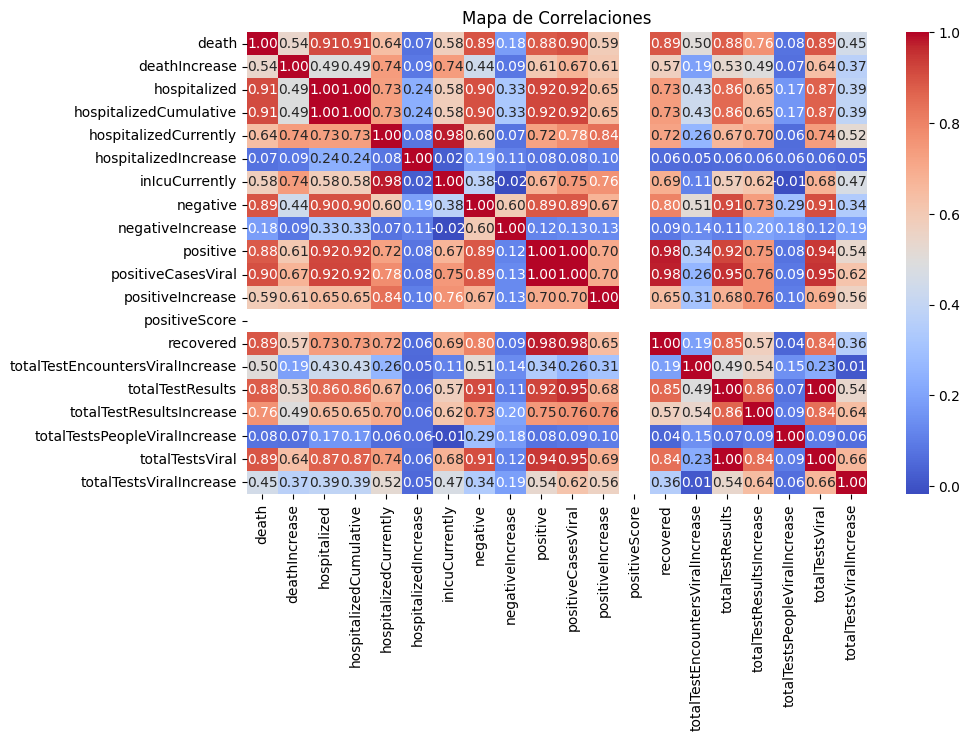

In [29]:
plt.figure(figsize=(10,6))
numeric_cols = df_cleaned.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Mapa de Correlaciones")
plt.show()

## Guardando el dataset limpio

In [28]:
df_cleaned.to_csv("all-states-history-cleaned.csv", index=False)

# Estados en el dataset

In [44]:
def show_states_from_data(file_path):
    """
    Carga el dataset y muestra los nombres únicos de los estados presentes en la tabla.
    """
    df = pd.read_csv(file_path)
    states = df["state"].unique()
    print("Estados en el dataset:")
    for state in states:
        print(state)

# Uso
file_path = "data/all-states-history.csv"  # Reemplaza con la ruta correcta
show_states_from_data(file_path)

Estados en el dataset:
AK
AL
AR
AS
AZ
CA
CO
CT
DC
DE
FL
GA
GU
HI
IA
ID
IL
IN
KS
KY
LA
MA
MD
ME
MI
MN
MO
MP
MS
MT
NC
ND
NE
NH
NJ
NM
NV
NY
OH
OK
OR
PA
PR
RI
SC
SD
TN
TX
UT
VA
VI
VT
WA
WI
WV
WY



| Columna 1         | Columna 2         | Columna 3         | Columna 4         |
|-------------------|-------------------|-------------------|-------------------|
| AK: Alaska        | DE: Delaware      | MD: Maryland      | OK: Oklahoma      |
| AL: Alabama       | FL: Florida       | ME: Maine         | OR: Oregon        |
| AR: Arkansas      | GA: Georgia       | MI: Michigan      | PA: Pennsylvania  |
| AS: American Samoa| GU: Guam          | MN: Minnesota     | PR: Puerto Rico   |
| AZ: Arizona       | HI: Hawaii        | MO: Missouri      | RI: Rhode Island  |
| CA: California    | IA: Iowa          | MP: Northern Mariana Islands | SC: South Carolina |
| CO: Colorado      | ID: Idaho         | MS: Mississippi   | SD: South Dakota  |
| CT: Connecticut   | IL: Illinois      | MT: Montana       | TN: Tennessee     |
| DC: District of Columbia | IN: Indiana | NC: North Carolina | TX: Texas       |
| KS: Kansas        | NE: Nebraska      | UT: Utah          | WI: Wisconsin     |
| KY: Kentucky      | NH: New Hampshire | VA: Virginia      | WV: West Virginia |
| LA: Louisiana     | NJ: New Jersey    | VI: U.S. Virgin Islands | WY: Wyoming |
| MA: Massachusetts | NM: New Mexico    | VT: Vermont       |                   |
| ND: North Dakota  | NV: Nevada        | WA: Washington    |                   |
| NY: New York      | OH: Ohio          |                   |                   |

## Estados con más casos positivos

In [46]:
df_states = df.groupby("state")[["positive", "death", "hospitalizedCurrently"]].max()
df_states = df_states.sort_values(by="positive", ascending=False)
df_states.head(10)  # Muestra los 10 estados con más casos

,positive,death,hospitalizedCurrently
state,,,
CA,3501394,54124,22851
TX,2686818,44451,14218
FL,1909209,32266,9520
NY,1681169,39029,18825
IL,1198335,23014,6175
GA,1023487,17906,6108
OH,978471,17656,5296
PA,948643,24349,6346
NC,872176,11502,3990


## Grafica

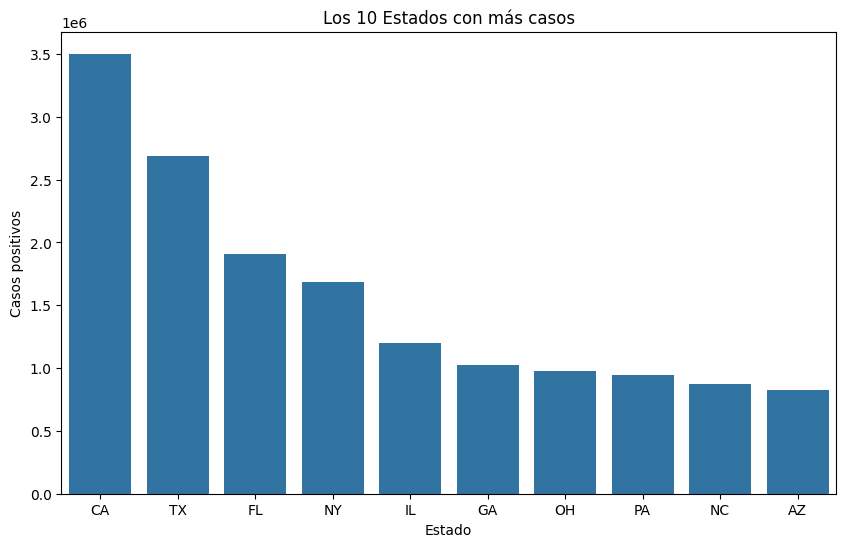

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_states.index[:10], y=df_states["positive"][:10])
plt.xlabel("Estado")
plt.ylabel("Casos positivos")
plt.title("Los 10 Estados con más casos")
plt.xticks(rotation=0)
plt.show()

## Evolucion de los casos en el tiempo

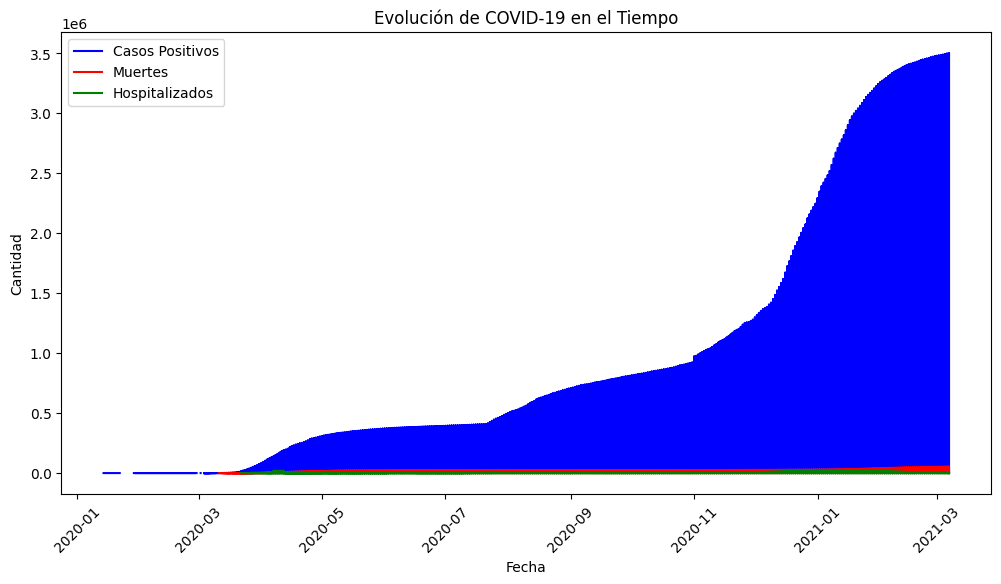

In [51]:
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
df_cleaned.set_index('date', inplace=True)

# Graficar los casos positivos, muertes y hospitalizaciones a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned["positive"], label="Casos Positivos", color="blue")
plt.plot(df_cleaned.index, df_cleaned["death"], label="Muertes", color="red")
plt.plot(df_cleaned.index, df_cleaned["hospitalizedCurrently"], label="Hospitalizados", color="green")

plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.title("Evolución de COVID-19 en el Tiempo")
plt.legend()

plt.xticks(rotation=45)
plt.show()

# Análisis de Pruebas
Vamos a comparar el número de pruebas con los casos detectados.
## Relación entre pruebas y casos positivos

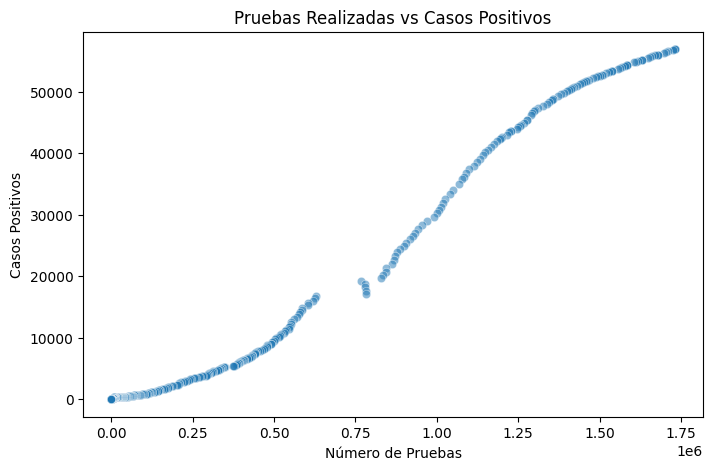

In [65]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["totalTestResults"], y=df_cleaned["positive"], alpha=0.5)
plt.xlabel("Número de Pruebas")
plt.ylabel("Casos Positivos")
plt.title("Pruebas Realizadas vs Casos Positivos")
plt.show()

## Casos positivos y hospitalizaciones

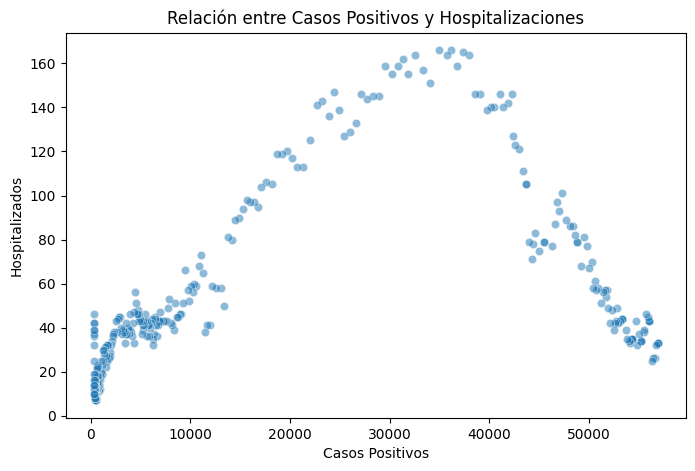

In [ ]:
# Verificando si hay duplicados
df_cleaned = df_cleaned.loc[~df_cleaned.index.duplicated(keep='first')]

# Graficar la relación entre los casos positivos y hospitalizados
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["positive"], y=df_cleaned["hospitalizedCurrently"], alpha=0.5)
plt.xlabel("Casos Positivos")
plt.ylabel("Hospitalizados")
plt.title("Relación entre Casos Positivos y Hospitalizaciones")
plt.show()

## Proporción de Casos Positivos que Son Hospitalizados

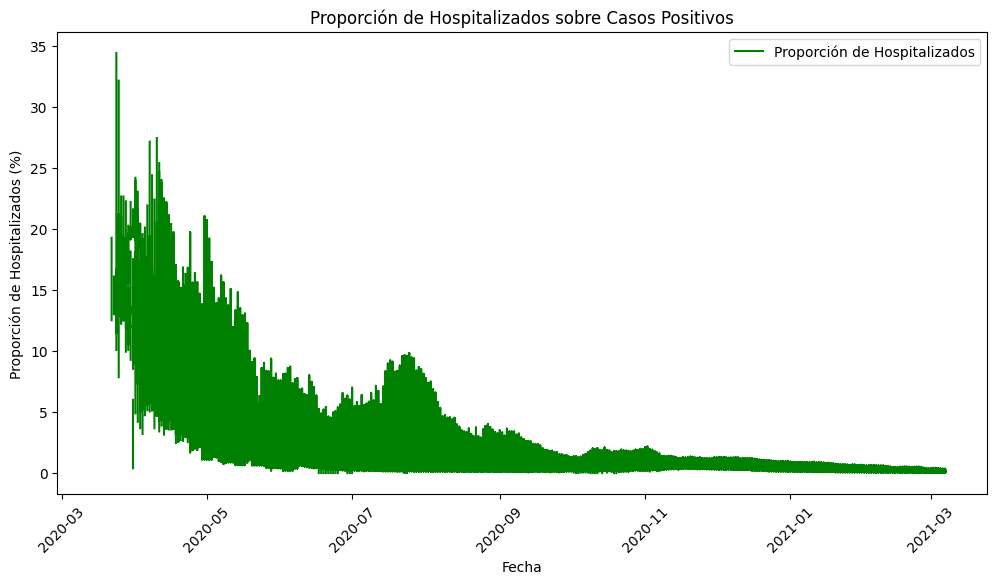

In [57]:
# Calcular la proporción de hospitalizados sobre casos positivos
df_cleaned['hospitalized_percentage'] = df_cleaned['hospitalizedCurrently'] / df_cleaned['positive'] * 100

# Graficar la proporción de hospitalizados
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned["hospitalized_percentage"], label="Proporción de Hospitalizados", color="green")

plt.xlabel("Fecha")
plt.ylabel("Proporción de Hospitalizados (%)")
plt.title("Proporción de Hospitalizados sobre Casos Positivos")
plt.legend()

plt.xticks(rotation=45)
plt.show()


## Correlacion de casos positivos, muertes y hospitalizaciones

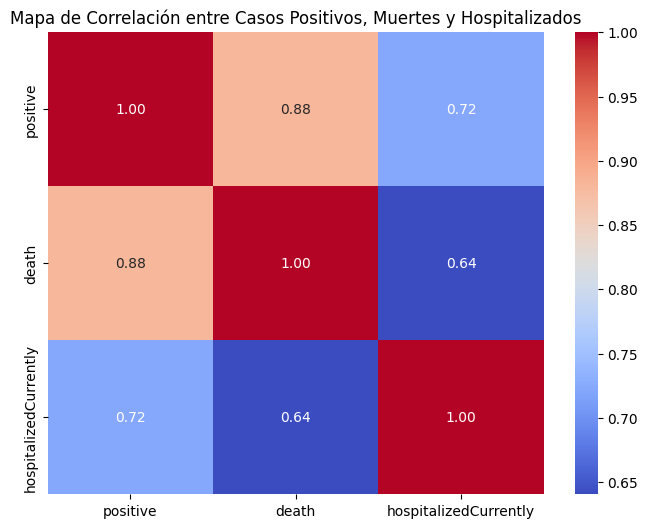

In [58]:
# Seleccionar columnas numéricas para la correlación
numeric_cols = df_cleaned[['positive', 'death', 'hospitalizedCurrently']]

# Calcular la correlación entre variables
correlation_matrix = numeric_cols.corr()

# Graficar la correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Mapa de Correlación entre Casos Positivos, Muertes y Hospitalizados")
plt.show()

## Tasa de Mortalidad

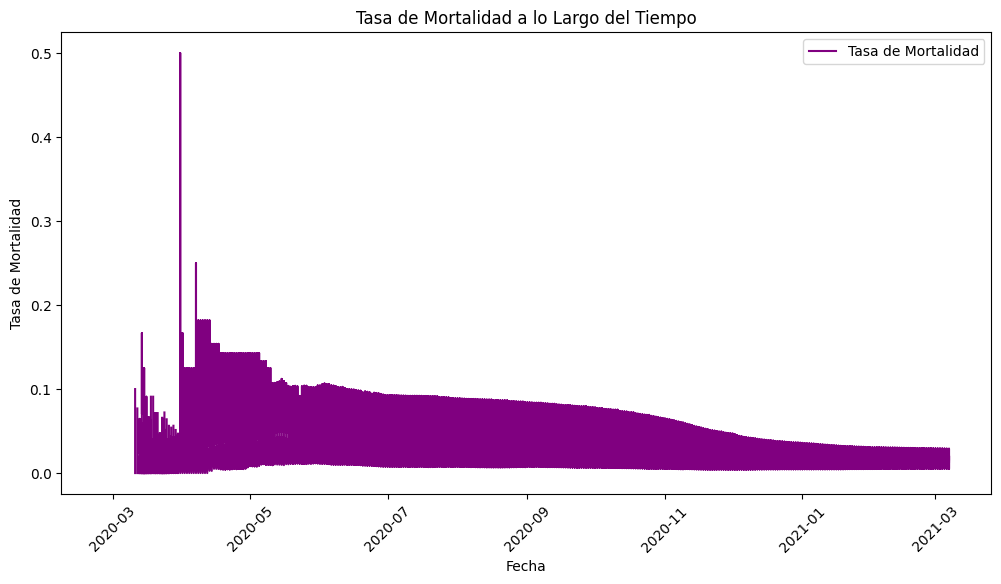

In [62]:
# Calcular la tasa de mortalidad
df_cleaned['mortality_rate'] = df_cleaned['death'] / df_cleaned['positive']

# Graficarla
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned["mortality_rate"], label="Tasa de Mortalidad", color="purple")

plt.xlabel("Fecha")
plt.ylabel("Tasa de Mortalidad")
plt.title("Tasa de Mortalidad a lo Largo del Tiempo")
plt.legend()

plt.xticks(rotation=45)
plt.show()